In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
import numpy as np

In [5]:
# Rt May 2-14
np.mean([3.30,2.96,2.57,2.67,3.41,3.44,2.81,3.16,3.21,2.48,3.36,4.42])

3.1491666666666673

In [22]:
# deaths; recoveries; active cases 
# 2020-05-07;973;18440;35390;;;35,390;+2.81%;973;+2.64%
# https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas
_deaths = 973
_recovered = 18440
_active = 35390

# R0 = beta/gamma
# wiki - mea
# R_0 = 2.8
R_0 = 3.15

# rt live
# R_0 = 1.01

# gamma = 1/7
gamma = 1/14
# rt live
# gamma_may = 1/15

beta_open = R_0 * gamma

n_TX = 29E6

I_0 = _active/n_TX

r_0 = (_recovered + _deaths)/n_TX

S_0 = 1.0 - (I_0 + r_0)



In [42]:
beta_open

0.22499999999999998

In [23]:
'''
Simple SIr simulation
Recall that:
                dS/dt = -beta*S*I
                dI/dt = beta*S*I - gamma*I
                dR/dt = gamma*I

Here, we call the solution y(t), where y(t) is a vector [S(t),I(t),R(t)].
The solution tells us what is the state of each group at each time point.

In order to run a simulation, we need to define our ordinary differential equations (ODE) by a function.
The input to this function is the state of the three groups in a single time point - y, and compute how they change  - dy
'''

def dSdt(S,I,b,g=gamma):
    return -b*S*I

def dIdt(S,I,b,g=gamma):
    return b*S*I - g*I

def dRdt(I,g=gamma):
    return g*I

def R_0(beta,gamma=gamma):
    return beta/gamma
    

In [24]:
# def SIr(y,t,b=beta):
def SIr(y,t,b):    
        # define the simulation parameters within the function
        [S,I,R] = y 
#         print(t)
#         print(t, y)
#         if I > .028:
#             print('t',t)
#             print('[S, I, R]',y)
# #             print('S',S)
# #             print('I',I)
# #             print('R',R)
#             print('---')
        dy      = np.empty(3)  
        
        dy[0] = dSdt(S,I,b)
        dy[1] = dIdt(S,I,b) 
        dy[2] = dRdt(I)
        
        return dy
    

----------------------------------------------------------------------

In [10]:
I_0

0.001220344827586207

In [12]:
r_0

0.0006694137931034483

In [11]:
S_0

0.9981102413793104

In [43]:
beta_open * 1.1

0.2475

In [101]:
n_days = 150
# Initial conditions
sol_open = odeint(SIr,[S_0,I_0,r_0],np.arange(0,n_days),args = (beta_open,))
sir_df_open = pd.DataFrame(sol_open,columns=['S','I','R'])

Text(0.5, 1.0, 'Simple SIr predicting Tx COVID-19 cases following May 1 reopening')

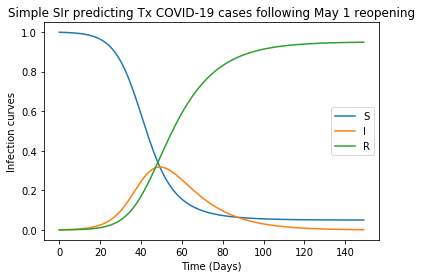

In [227]:
sir_df_open.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curves')
# plt.axvline(x=30,color='red',linewidth='0.75')
# plt.axvline(x=30+32,color='red',linewidth='0.75')
plt.title('Simple SIr predicting Tx COVID-19 cases following May 1 reopening')

Text(0.5, 1.0, 'Simple SIr predicting Tx COVID-19 cases May 31-July 2, without mass protests')

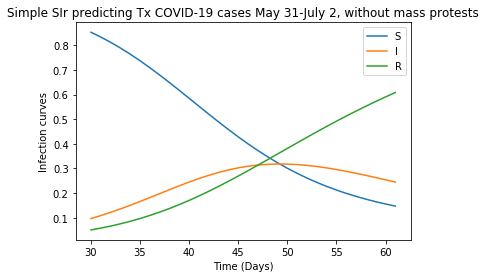

In [105]:
sir_df_open.iloc[30:30+32].plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curves')
plt.title('Simple SIr predicting Tx COVID-19 cases May 31-July 2, without mass protests')

In [163]:
beta_open*1.3

0.2925

In [164]:
np.argmax(sir_df_open.I)

49

In [79]:
max(sir_df_open.I)

0.3181632072146415

In [129]:
max(sir_df_open.I)*29E6

9226733.009224603

In [31]:
sir_df_open.R.iloc[-1]

0.9496975950930052

In [40]:
beta_open * 1.5

0.33749999999999997

In [44]:
daysPreMG = 29 

In [209]:
# day 31. initial conditions at the 30th day (0-based ix) 
sol_mg = odeint(SIr, [sir_df_open.S.iloc[daysPreMG], sir_df_open.I.iloc[daysPreMG], sir_df_open.R.iloc[daysPreMG]],np.arange(daysPreMG, daysPreMG+32), args=(beta_open*1.29,))

In [210]:
sir_df_mg = pd.DataFrame(sol_mg,columns=['S','I','R'])

In [211]:
sol_close = odeint(SIr, [sir_df_mg.S.iloc[-1], sir_df_mg.I.iloc[-1], sir_df_mg.R.iloc[-1]],np.arange(daysPreMG+32,n_days), args=(beta_open,))

In [212]:
sir_df_close = pd.DataFrame(sol_close,columns=['S','I','R'])

Text(0.5, 1.0, 'Simple SIr predicting Tx COVID-19 during May 31-July 2 protests')

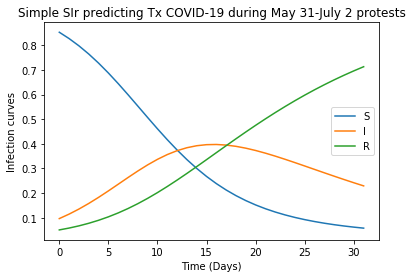

In [213]:
sir_df_mg.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curves')
plt.title('Simple SIr predicting Tx COVID-19 during May 31-July 2 protests')

In [214]:
np.argmax(sir_df_mg.I)

16

In [215]:
beta_open*1.29

0.29024999999999995

In [216]:
max(sir_df_mg.I)

0.39731752054682834

In [217]:
sir_df_close.R.iloc[-1]

0.9737507350889599

In [218]:
df_open_mg_close = pd.concat([sir_df_open[:daysPreMG],sir_df_mg,sir_df_close[1:]])

In [219]:
df_open_mg_close

,S,I,R
0,0.998110,0.001220,0.000669
1,0.997814,0.001422,0.000764
2,0.997469,0.001657,0.000873
3,0.997067,0.001931,0.001001
4,0.996599,0.002250,0.001150
5,0.996054,0.002622,0.001324
6,0.995420,0.003054,0.001526
7,0.994681,0.003557,0.001762
8,0.993821,0.004142,0.002036
9,0.992821,0.004823,0.002356


In [220]:
df_open_mg_close.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'Simple SIr pre- post- and during monthslong mass protests')

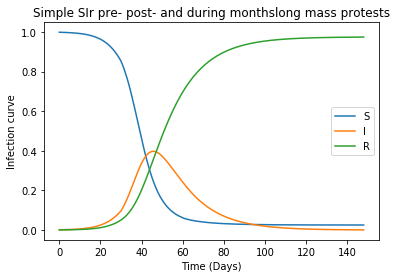

In [226]:
df_open_mg_close.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curve')
# plt.axvline(x=30,color='red',linewidth='0.75')
# plt.axvline(x=30+32,color='red',linewidth='0.75')
plt.title('Simple SIr pre- post- and during monthslong mass protests')

In [222]:
np.argmax(df_open_mg_close.I)

46

In [223]:
max(df_open_mg_close.I)

0.39731752054682834

In [224]:
df_open_mg_close.R.iloc[-1]

0.9737507350889599

In [228]:
df_open_mg_close.R.iloc[-1] - sir_df_open.R.iloc[-1]

0.02591949033225438

In [225]:
(df_open_mg_close.R.iloc[-1] - sir_df_open.R.iloc[-1]) * 29E6 *.01

7516.652196353771